
# Project: Investigate TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction





### In this investigation of the dataset I want to analyze the following:
- What would be the reasons for a movie to be successful
- What role does the budget and revenue of the movies play in their success
- what are the runtime of the movies
- what are the profited movies
- How does the cast, genres, directors relate to the success of the movies


In [2]:
# All the necessary packages have been imported
import pandas as pd
import numpy as np
from datetime import datetime
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

### Assessing data:
#### In the data assessing part i have done the following:
#### 1. Gather the data.
#### 2. Get the rows and columns of the dataset.
#### 3. Finding the non-null objects columns.
#### 4. Summary statistics of every column.
#### 5. Finding the number of null values.
#### 6. Datatypes of the columns.
#### 7. Unique values in a particular column.


### Gather

In [3]:
#loading data

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### ASSESS

In [21]:
df.query('budget== 0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.0,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.000000e+00
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.0,2.150550e+08
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.000000e+00
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.000000e+00


In [3]:
# To obtain the no. of rows and columns of the dataset
df.shape

(10866, 21)

In [4]:
# This gives the info about no.of non-null samples in each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# This gives the summary statistics of each column
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# To obtain the no. of unique elements the release_year column.
df.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

In [9]:
# To find the number of nulls in each column.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

# Data cleaning
## This process includes cleaning and trimming the data to make it easier to work with.


In [5]:
df.drop(['id', 'imdb_id', 'keywords','homepage','overview','production_companies', 'tagline', 'budget_adj', 'revenue_adj' ], axis = 1, inplace = True)

From the above we have dropped some of the columns as a part of our analyis.
The columns that were dropped are:
  id, imdb_id, keywords, homepage, overview, production_companies, tagline, budget_adj, revenue_adj.
These columns were dropped because i found them extraneous in my analysis.

In [6]:
# The dataset after dropping extraneous columns.
df

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.2,2015
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,2015-06-23,2598,5.8,2015
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,2015-09-30,4572,7.6,2015
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,2015-06-17,2893,6.5,2015
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,2015-06-09,3935,8.0,2015


In [19]:
# This is just to check what columns are present.
for i,v in enumerate(df.columns):
   print(i,v)

0 popularity
1 budget
2 revenue
3 original_title
4 cast
5 director
6 runtime
7 genres
8 release_date
9 vote_count
10 vote_average
11 release_year


In [20]:
# To check for the nulls in the new dataset.
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [21]:
# To get the no. of duplicated rows in the dataset
sum(df.duplicated())

0

In [7]:
# Drop the duplicates if found any and make a permanent change to the dataset using inplace.
df.drop_duplicates(inplace = True)

In [23]:
# The no. of rows after dropping the duplicates.
df.shape

(10865, 12)

### Define:
#### change the release date datatype to datetime.

### Code:

In [8]:
df['release_date'] = pd.to_datetime(df['release_date'])

popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

### Test:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       

From the above cell release_date has been converted into original datetime format.

### Define:
#### Change the values 0 to NaN in the columns budget and revenue..

### Code:

In [5]:
# To drop the 0s in the budget column and make the change permanent with inplace

df['budget']=df['budget'].replace(0, 'NaN')

### Test:

In [8]:
df.query('budget=="NaN"')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,NaN,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,NaN,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,NaN,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,NaN,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,NaN,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
88,301875,tt3289728,1.959765,NaN,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.0,1.839999e+06
92,370687,tt3608646,1.876037,NaN,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.000000e+00
95,258509,tt2974918,1.841779,NaN,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.0,2.150550e+08
100,326359,tt4007502,1.724712,NaN,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.000000e+00
101,254302,tt0462335,1.661789,NaN,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.000000e+00


### Define:
#### replace 0 with NaN

### Code:

In [9]:
df['revenue']= df['revenue'].replace(0,'NaN')

### Test:

In [10]:
df.query('revenue== "NaN"')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,NaN,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,NaN,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,NaN,NaN,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,NaN,NaN,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,NaN,NaN,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
93,307663,tt3480796,1.872696,10000000,NaN,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,NaN,Brian A Miller,Where the future is your past.,...,Julian Michaels has designed the ultimate reso...,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181,4.1,2015,9.199996e+06,0.0
100,326359,tt4007502,1.724712,NaN,NaN,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.000000e+00,0.0
101,254302,tt0462335,1.661789,NaN,NaN,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.000000e+00,0.0
103,292040,tt3321300,1.646664,NaN,NaN,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,http://www.shinepictures.co.uk/films/9/spooks-...,Bharat Nalluri,NaN,...,During a handover to the head of counter-terro...,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,4/11/15,114,5.6,2015,0.000000e+00,0.0
116,297291,tt3086386,1.380320,NaN,NaN,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,NaN,Mike Elliott,Action Adventure,...,"When he is betrayed by a trusted friend, Matha...",105,Action|Fantasy|Adventure,Universal Pictures,1/9/15,22,4.5,2015,0.000000e+00,0.0


## Data has been cleaned
## The cleaning process included the following steps:
## 1. Dropping the extraneous columns.
## 2. Removing the duplicate columns.
## 3. Changing the data type of release_date to datetime format.
## 4. Dropping 0s from the budget and revenue columns.
## 5. Checking for Nulls.



# moving on to exploratory Data Analysis.


<a id='eda'></a>
## Exploratory Data Analysis


In [27]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


#### Lets add a new column to find the profit earned by each movie.

In [11]:
# Calculating profit earned by each movie.
df['profit'] = df['revenue']-df['budget']

In [12]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1316249360


#### I wish to explore numeric variables such as budget, popularity, profit, release_year, revenue, runtime, vote_average, vote_count and their distribution.

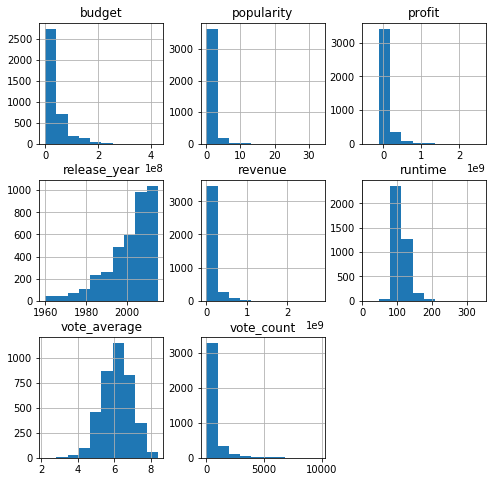

In [17]:
df.hist(figsize= (8,8));

### The above is the plots of various features of the dataset. 
### From the above plot.
- The variable budget, popularity, profit, revenue, runtime, vote_count are right skewed, while release_year is left skewed and vote_average follows a log normal distribution.
- The above plot shows the distribution of various variables.

In [25]:
df_ry = df.groupby('release_year').mean().astype(int)
df_ry

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
release_year,,,,,,,
1960,1,4161389,25801000,130,372,7,21639610
1961,0,3863700,33772018,132,191,6,29908318
1962,0,5635714,29475692,141,229,6,23839978
1963,1,10185833,29421147,153,262,6,19235313
1964,1,4847880,46944792,122,343,6,42096912
1965,1,11760000,91616370,167,221,6,79856370
1966,0,6453600,16947337,132,45,6,10493737
1967,0,7346153,56294972,118,189,6,48948818
1968,0,5994444,24691306,130,338,6,18696862


### The above dataset is formed by grouping the release years to give the mean of every columns for their respective years.


### Next I would like to plot the mean of the numeric variables over each year.

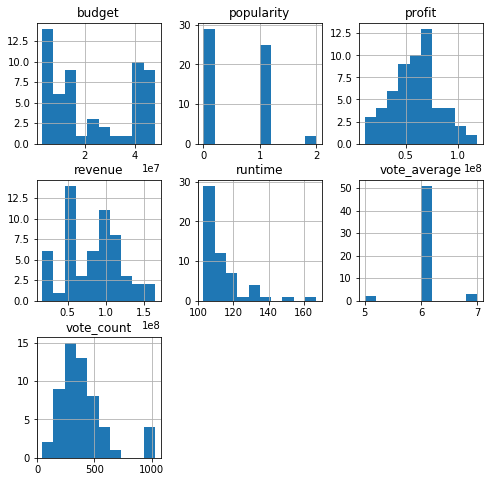

In [26]:
df_ry.hist(figsize= (8,8));

### The above plots give the mean of numeric variables with respect to years.

### Below are the plots of runtime, revenue and budget w.r.t release years of the movies.
### How they show up over the years.


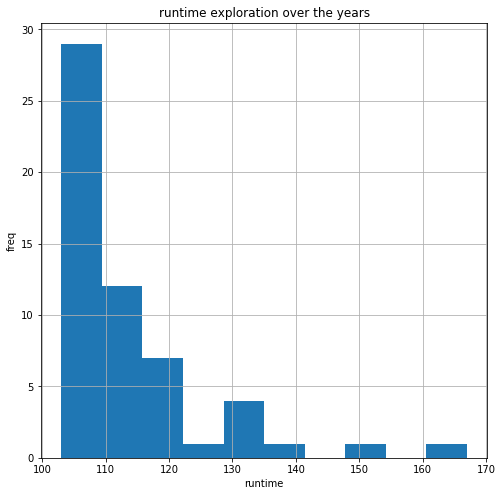

In [27]:
df_ry['runtime'].hist(figsize = (8,8))
plt.title('runtime exploration over the years')
plt.xlabel('runtime')
plt.ylabel('freq');


### From the above plot the runtime of the movies seems to be right skewed with most of the points fall in the region 102 to 120(minutes).


### Next up is plot of revenue variations 

Text(0,0.5,'freq')

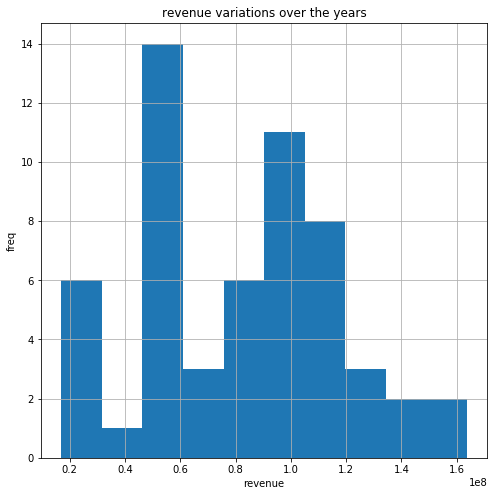

In [28]:
df_ry['revenue'].hist(figsize=(8,8))
plt.title('revenue variations over the years')
plt.xlabel('revenue')
plt.ylabel('freq')

### The above plot of revenue variations is multimodal.
### The highest revenue falling in the region between 0.5 and 0.6 which is between 500 million dollars to 600 million dollars

### Next budget variations

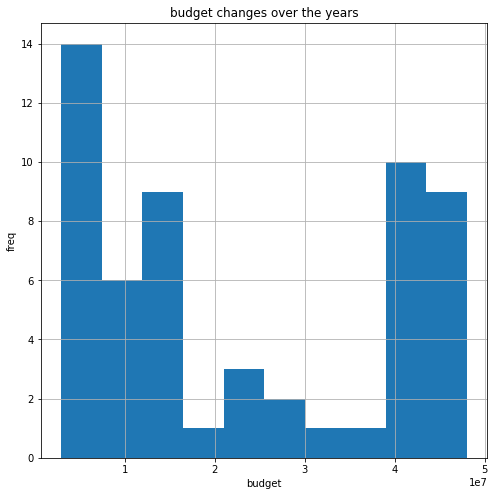

In [29]:
df_ry['budget'].hist(figsize=(8,8))
plt.xlabel('budget')
plt.ylabel('freq')
plt.title('budget changes over the years');

### Even the budget variation is multimodal
### Most frequent budget for the movies falling in the region 0-1.

### Below is the plot between release years and profit
### which gives the mean of the profits earned by movies each year.

In [63]:
# grouping by release_year and then performing mean to obtain mean profit of all the movies each year.
df_profit_yr = df.groupby('release_year').mean().profit

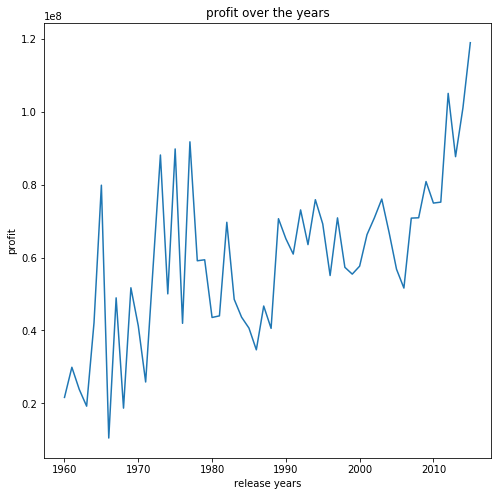

In [33]:
plt.figure(figsize=(8,8) )
plt.xlabel('release years')
plt.ylabel('profit')
plt.title('profit over the years')
plt.plot(df_profit_yr)
plt.show()



### From the above plot the profit tends to follow a linear trend 

In [34]:
#Summary statistics of profit column.
df['profit'].describe().astype(int)

count          3854
mean       70482919
std       150619531
min      -413912431
25%        -1321535
50%        20020190
75%        81703308
max      2544505847
Name: profit, dtype: int64

## Research question 1 : Which movie has earned the maximum profit?

In [36]:
## query to obtain the movie with max profit.
df.query('profit==2544505847')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009,2544505847


### From the above the query the movie with the max profit is "Avatar" with a profit of 2544505847 U.S dollars.
### I have considered dollars for convenience.

## Research question 2: Which movie has earned the minimum profit?

In [40]:
# query to obtain the movie with min profit.
df.query('profit==-413912431')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
2244,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,74,6.4,2010,-413912431


### The movie with the minimum profit or we can say loss is "The warrior's way"  with a least profit of -413912431 USD.

In [41]:
# Summary statistics of revenue column.
df['revenue'].describe().astype(int)

count          3854
mean      107686616
std       176539346
min               2
25%        13600032
50%        44800002
75%       124212540
max      2781505847
Name: revenue, dtype: int64

## Research question 3: Which movie has earned the maximum revenue?

In [42]:
df.query('revenue==2781505847')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009,2544505847


### The movie with max revenue is "Avatar" with 2781505847 USD.

## Research Question 4: Which movie has earned least revenue?

In [43]:
df.query('revenue==2')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
5067,0.462609,6000000,2,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,94,Drama|History,2003-11-14,46,6.4,2003,-5999998
8142,0.552091,6000000,2,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,94,Romance|Comedy,1995-10-20,201,6.8,1995,-5999998


### Movies with least revenue are ''Shattered Glass" and "Mallrats" with 2 USD.

In [44]:
# Summary statistics of budget column.
df['budget'].describe().astype(int)

count         3854
mean      37203696
std       42208224
min              1
25%       10000000
50%       24000000
75%       50000000
max      425000000
Name: budget, dtype: int64

## Research question 5: Highest and least budget of movies?

In [45]:
df.query('budget==425000000')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
2244,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,74,6.4,2010,-413912431


### Movie with the Highest budget is "The Warrior's way" with 425000000 USD.

In [46]:
df.query('budget==1')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
2618,0.090186,1,100,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,95,Comedy|Romance,1999-04-23,14,4.8,1999,99
3581,0.520430,1,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,90,Comedy|Romance,2011-06-03,55,5.3,2011,1377



### Movies with the least budget are "Lost & found" and "Love, wedding, marriage" with 1 USD.

In [76]:
#Summary statistics of runtime.
df['runtime'].describe().astype(int)

count    3854
mean      109
std        19
min        15
25%        95
50%       106
75%       119
max       338
Name: runtime, dtype: int64

## Research question 6: Movies with max, min and avg runtime?

In [48]:
df.query('runtime==338')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
2107,0.534192,18000000,871279,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Olivier Assayas,338,Crime|Drama|Thriller|History,2010-05-19,35,6.2,2010,-17128721


### Movie with max runtime is "Carlos" with 338 minutes.

In [49]:
df.query('runtime==15')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
5162,0.208637,10,5,Kid's Story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Shinichiro Watanabe,15,Science Fiction|Animation,2003-06-02,16,6.8,2003,-5


## Movie with min runtime is "kid's Story" with 15 minutes.

In [50]:
df.query('runtime==109')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
16,5.749758,48000000,325771424,Taken 3,Liam Neeson|Forest Whitaker|Maggie Grace|Famke...,Olivier Megaton,109,Crime|Action|Thriller,2015-01-01,1578,6.1,2015,277771424
47,2.968254,12000000,85512300,Paper Towns,Nat Wolff|Cara Delevingne|Halston Sage|Justice...,Jake Schreier,109,Drama|Mystery|Romance,2015-07-09,1252,6.2,2015,73512300
142,1.138395,40000000,34227298,Victor Frankenstein,James McAvoy|Daniel Radcliffe|Jessica Brown Fi...,Paul McGuigan,109,Drama|Science Fiction|Thriller,2015-11-10,408,5.5,2015,-5772702
707,1.900038,40000000,196781193,The Other Woman,Cameron Diaz|Leslie Mann|Kate Upton|Don Johnso...,Nick Cassavetes,109,Comedy|Romance,2014-04-16,1056,6.2,2014,156781193
768,0.981740,27000000,28831145,Draft Day,Kevin Costner|Jennifer Garner|Tom Welling|Sam ...,Ivan Reitman,109,Drama,2014-04-11,207,6.5,2014,1831145
1344,0.495480,5500000,26414658,The Gauntlet,Clint Eastwood|Sondra Locke|Pat Hingle|William...,Clint Eastwood,109,Drama|Action|Crime|Thriller,1977-12-21,45,6.7,1977,20914658
1421,1.542135,53000000,126690726,Law Abiding Citizen,Jamie Foxx|Gerard Butler|Colm Meaney|Bruce McG...,F. Gary Gray,109,Drama|Crime|Thriller,2009-10-15,900,7.2,2009,73690726
1462,0.999299,27000000,29000000,Case 39,RenÃ©e Zellweger|Jodelle Ferland|Ian McShane|K...,Christian Alvart,109,Horror|Mystery|Thriller,2009-08-13,298,6.0,2009,2000000
1470,0.908112,18000000,36133014,Love Happens,Aaron Eckhart|Jennifer Aniston|Judy Greer|Mart...,Brandon Camp,109,Drama|Romance,2009-09-18,117,5.5,2009,18133014
1527,0.608282,40000000,28169671,Cirque du Freak: The Vampire's Assistant,John C. Reilly|Josh Hutcherson|Chris Massoglia...,Paul Weitz,109,Adventure|Fantasy|Action|Thriller,2009-10-23,218,5.5,2009,-11830329


### Average runtime of movies is 109 minutes.

In [41]:
# Profit earned by movies each year.
df.groupby('release_year').sum().profit

release_year
1960      108198052
1961      299083188
1962      166879846
1963      115411882
1964      294678387
1965      399281854
1966       52468689
1967      636334637
1968      168271762
1969      206862989
1970      454070023
1971      336284710
1972      457235917
1973     1057686099
1974      650582027
1975      808207270
1976      629426536
1977     1743308485
1978     1005100089
1979      950330150
1980     1002065664
1981     1320251458
1982     1811756359
1983     1505073842
1984     1833438131
1985     1666899046
1986     1665354869
1987     2148546726
1988     2313076703
1989     3603940908
1990     3454904971
1991     3048121485
1992     3873046070
1993     4575828325
1994     4704384415
1995     5608098320
1996     4736626727
1997     6380241248
1998     5274145395
1999     6433209130
2000     6110774823
2001     8022044875
2002     9004589344
2003     9202155213
2004     9822506642
2005     9259452998
2006     8726299999
2007    11686103667
2008    11843373159
2009   

## Research question 7: What are the profited movies?
## Solution : Below is the dataset with profited movies with profit level above or equal to 75%.

In [42]:
# To form a new dataset with only profited movies 
profited_movies = df.query('profit>=70482919')
profited_movies

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1316249360
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.2,2015,397950503
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,2015-06-23,2598,5.8,2015,285603537
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,2015-09-30,4572,7.6,2015,487380321
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,2015-06-17,2893,6.5,2015,1082730962
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,2015-06-09,3935,8.0,2015,678708609


### The above dataset contains samples of only profited movies with level of profit above or equal to 75%.
### The above dataset is npw reduced to 1066 samples by filtering out only profited movies.

### Lets plot the numeric variables of the profited movies

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fb5c72b00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8fb5a12b70>]], dtype=object)

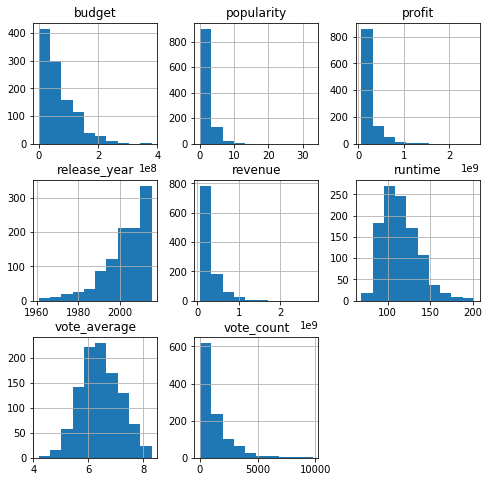

In [43]:
profited_movies.hist(figsize= (8,8))

### The variables budget, popularity, profit, revenue, votecount are right skewed, release_year is left skewed and voteaverage and runtime are normally distributed.

In [44]:
#summary statistics of profited movies.
profited_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,1066.000000,1.066000e+03,1.066000e+03,1066.000000,1066.000000,1066.000000,1066.000000,1.066000e+03
mean,2.197640,6.652549e+07,2.954453e+08,114.666979,1255.746717,6.435741,2002.497186,2.289198e+08
std,2.252596,5.548990e+07,2.460044e+08,20.963388,1299.205290,0.698643,10.596859,2.129344e+08
min,0.131526,1.130000e+02,7.226631e+07,69.000000,14.000000,4.200000,1961.000000,7.067379e+07
25%,1.051262,2.500000e+07,1.477966e+08,99.000000,385.500000,6.000000,1997.000000,1.029661e+08
50%,1.615436,5.000000e+07,2.139415e+08,112.000000,787.500000,6.400000,2005.000000,1.534031e+08
75%,2.585034,9.000000e+07,3.521741e+08,127.000000,1665.500000,6.900000,2011.000000,2.642828e+08
max,32.985763,3.800000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,2.544506e+09


In [45]:
# This is to filter out the dataset with genes column having multiple elements separated by "|".
hb_profited_movies = profited_movies[profited_movies['genres'].str.contains('|')]

In [46]:
hb_profited_movies

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1316249360
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.2,2015,397950503
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,2015-06-23,2598,5.8,2015,285603537
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,2015-09-30,4572,7.6,2015,487380321
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,2015-06-17,2893,6.5,2015,1082730962
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,2015-06-09,3935,8.0,2015,678708609


### The above dataset is a hybrid dataset with genres coulmn having multiple elements in each row.

In [47]:
# The columns to be split which have elements separated by |
split_column = ['genres','cast']

In [48]:
# Using the apply function to splite the columns.
for c in split_column:
    hb_profited_movies[c]= hb_profited_movies[c].apply(lambda x:x.split("|")[0])

In [49]:
hb_profited_movies

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,2015-05-13,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,2015-03-18,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,2015-12-15,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,137,Action,2015-04-01,2947,7.3,2015,1316249360
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western,2015-12-25,3929,7.2,2015,397950503
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger,Alan Taylor,125,Science Fiction,2015-06-23,2598,5.8,2015,285603537
7,7.667400,108000000,595380321,The Martian,Matt Damon,Ridley Scott,141,Drama,2015-09-30,4572,7.6,2015,487380321
8,7.404165,74000000,1156730962,Minions,Sandra Bullock,Kyle Balda|Pierre Coffin,91,Family,2015-06-17,2893,6.5,2015,1082730962
9,6.326804,175000000,853708609,Inside Out,Amy Poehler,Pete Docter,94,Comedy,2015-06-09,3935,8.0,2015,678708609


## The above the dataset is the dataset without mutilple values in the columns genres and cast.

## Research question 8: How does the profited movies relate to cast?

In [59]:
hb_profited_movies['cast'].value_counts(ascending = False).head()

Tom Cruise            24
Tom Hanks             18
Sylvester Stallone    17
Adam Sandler          17
Jim Carrey            14
Name: cast, dtype: int64

## The above is the answer to the relation between cast and profited movies.
## The above five results are one of the reasons for a movie to be successful.
### 1.Tom cruise
### 2.Tom Hanks
### 3. Sylvester Stallone
### 4. Adam Sandler
### 5. Jim Carrey

## Research question 9: How does genres relate to the success of a movie?

In [60]:
hb_profited_movies['genres'].value_counts(ascending= False).head()

Action       209
Comedy       203
Drama        174
Adventure    150
Animation     59
Name: genres, dtype: int64

## I have grouped genres with profit to perform calcution of profit count on each genre type.
## The result is:
## The top 5 successful genres are: 
### 1. Action : 209
### 2. Comedy : 203
### 3. Drama : 174
### 4. Adventure : 150
### 5. Animation : 59

## Research question 10:What role does a director play in the success of the movie?

In [62]:
hb_profited_movies['director'].value_counts(ascending= False).head()

Steven Spielberg      22
Robert Zemeckis       12
Ridley Scott          10
Tim Burton             8
M. Night Shyamalan     8
Name: director, dtype: int64

## These are the results of some of the successful directors.
### 1. Steven Spielberg
### 2. Robert Zemeckis
### 3. Ridley Scott
### 4. Tim Burton
### 5. M. Night Shyamalan

## Research question 11: How does the budget, revenue, runtime relate to the profited movies?

In [66]:
hb_profited_movies['budget'].mean()

66525485.245778613

In [67]:
hb_profited_movies['revenue'].mean()

295445263.57035649

In [64]:
hb_profited_movies['runtime'].mean()

114.66697936210132

### Next I want to plot runtime of profited movies.

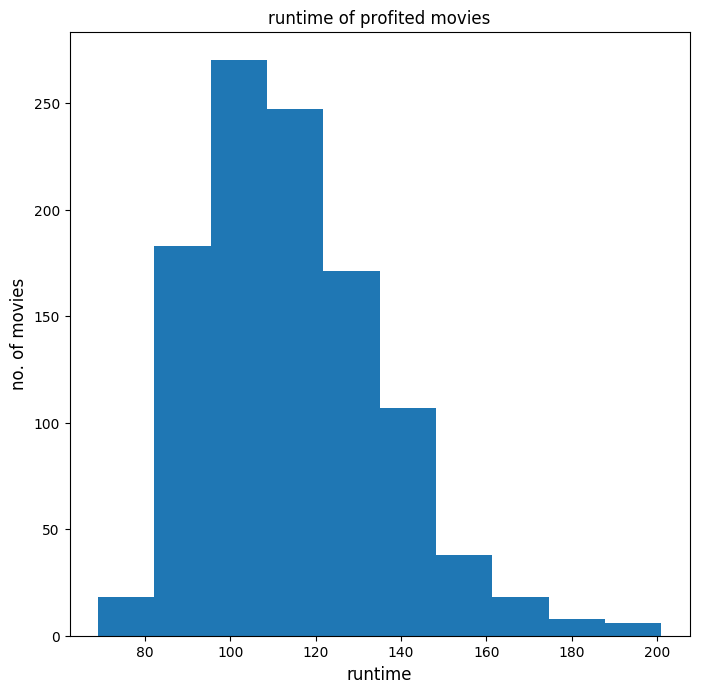

In [65]:
plt.figure(figsize=(8,8), dpi = 100)
plt.xlabel('runtime', fontsize= 12)
plt.ylabel('no. of movies', fontsize= 12)
plt.title('runtime of profited movies', fontsize= 12)
plt.hist(hb_profited_movies['runtime'])
plt.show()

### Thus runtime of profited movies falling in the region 100-120 minutes.

<a id='conclusions'></a>
## Conclusions
> It was really fun and engaging working with this dataset.
> In this investigation of TMDB dataset i have followed these steps below.
> 1.Data wrangling:
>   In this part I have assessed the dataset thoroughly.
> 2.Data cleaning:
>   In this part I have cleaned and trimmed the data for the furthur analysis of dataset with ease.
> 3.Exploratory Data analysis:
    Here I have communicated some of my findings through some plots and also by posing some questions.
    The questions I have raised regarding the dataset are:
    1. what are the most and least profited movies?
    2. what are the highest and least budget movies?
    3. what are the highest and least revnue earned movies?
    4. what are the runtime of the movies?
    5. what are the profited movies?
    6. How does the cast, genres, directors relate to the success of the movies?
    7. what are the average runtime, budget, and revenue of the profited movies?
 > I have the obtained the results with respect to the questions mentioned above.
 > For a movie to be successful these should be included:
   Cast : Tom cruise, Tom Hanks, Sylvester stallone, Adam Sandler, Jim Carrey
   Genres : Action, Comedy, Drama, Adventure, Animation
   Director : Steven Speilberg, Robert Zemeckis, Ridley Scott, Tim Burton, M. Night Shyamalan
   Runtime : 114 minutes.
   Budget : 66525485 USD.
 
 ## Limitations : 
 > The assumptions i have considered may not be completely true. Dropping some of the rows which i found extraneous may also be useful in analysing the data in a different way. For convenience i have considered currency to be USD and also movie runtime has not been mentioned.
  
   
   
    

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [11]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0